In [1]:
# Install necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import necessary dataset

df = pd.read_csv('C:/Users/ariji/OneDrive/Desktop/Data science & ML/Unsupervised Machine Learning/Data/cereal.csv')
df.head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,100%_Bran,Nabisco,70,4,1,6,25
1,100%_Natural_Bran,Quaker Oats,120,3,5,8,0
2,All-Bran,Kelloggs,70,4,1,5,25
3,All-Bran_with_Extra_Fiber,Kelloggs,50,4,0,0,25
4,Almond_Delight,Ralston Purina,110,2,2,8,25


In [3]:
# drop the name and manufactuer column 

data = df[['Calories', 'Protein (g)', 'Fat', 'Sugars', 'Vitamins and Minerals']]
data.head()

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,70,4,1,6,25
1,120,3,5,8,0
2,70,4,1,5,25
3,50,4,0,0,25
4,110,2,2,8,25


In [4]:
# 2. Standardize the remaining columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_ft = scaler.fit_transform(data)
data_scaled = pd.DataFrame(scaler_ft, columns=data.columns)
data_scaled.head()

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,-1.940286,1.387392,0.056478,-0.173586,-0.149270
1,0.789394,0.462464,4.235869,0.277129,-1.253871
2,-1.940286,1.387392,0.056478,-0.398944,-0.149270
3,-3.032158,1.387392,-0.988369,-1.525731,-0.149270
4,0.243458,-0.462464,1.101326,0.277129,-0.149270


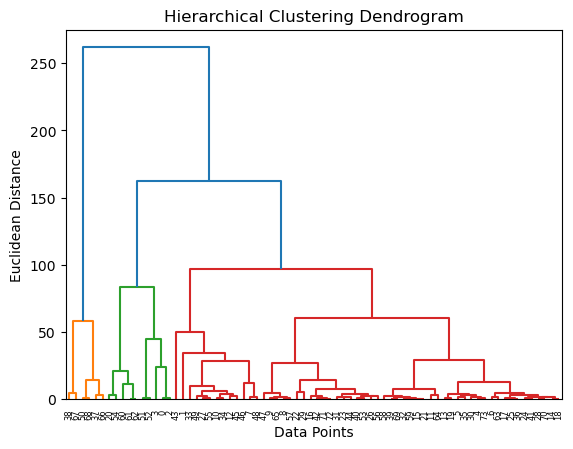

In [5]:
# 1. Create a dendrogram using the 5 numeric fields of the cereal data set
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linkage_matrix = linkage(data, method='ward')
dendrogram_info = dendrogram(linkage_matrix, color_threshold=100)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance");

In [ ]:
# 2. Visually identify the ”best” number of clusters and adjust the color_threshold: there seem to be four or five clusters

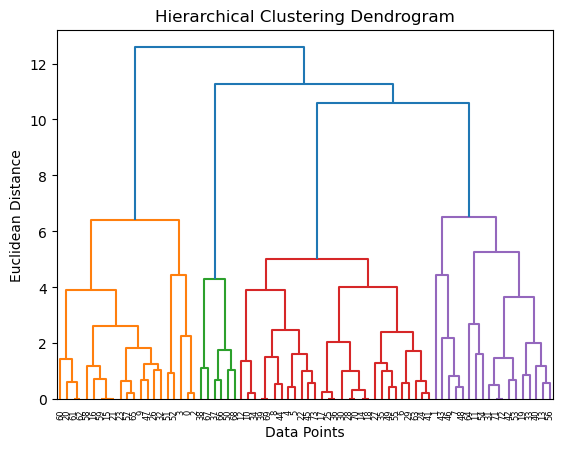

In [11]:
# 3. Create a dendrogram using the 5 numeric, standardized fields  of the cereal data set
linkage_matrix_scaled = linkage(data_scaled, method='ward')
dendrogram_info_scaled = dendrogram(linkage_matrix_scaled, color_threshold=7.5)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance");

In [ ]:
# 4. Visually identify the ”best” number of clusters and adjust the color_threshold: there seem to be four clusters

In [12]:
# 5. Fit an agglomerative clustering model on the scaled data set with four clusters and view the labels
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(4)
agg.fit(data_scaled)

agg.labels_

array([1, 0, 1, 1, 3, 3, 3, 0, 3, 1, 3, 0, 3, 0, 3, 1, 1, 3, 3, 0, 1, 1,
       3, 1, 3, 3, 1, 3, 3, 3, 3, 0, 1, 0, 3, 3, 3, 2, 2, 3, 0, 3, 0, 0,
       3, 3, 0, 1, 0, 3, 2, 1, 1, 0, 0, 3, 0, 1, 1, 1, 1, 1, 1, 3, 0, 1,
       2, 2, 2, 3, 3, 0, 0, 3], dtype=int64)

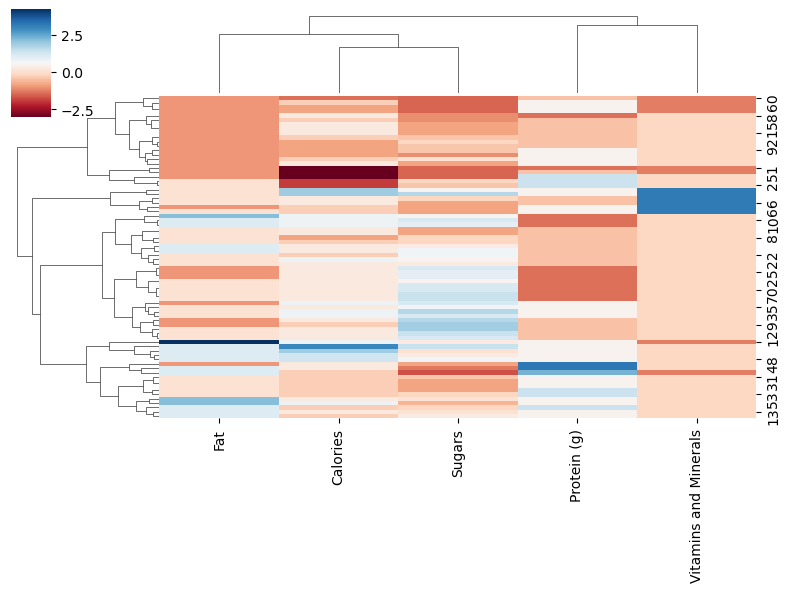

In [13]:
# 6. Create a cluster map of the “best” results and interpret the clusters
sns.clustermap(data_scaled, method='ward', cmap='RdBu', figsize=(8,6), xticklabels=data_scaled.columns)
plt.show()

In [ ]:
# hard to differentiate the clusters , hence going for row level standardization

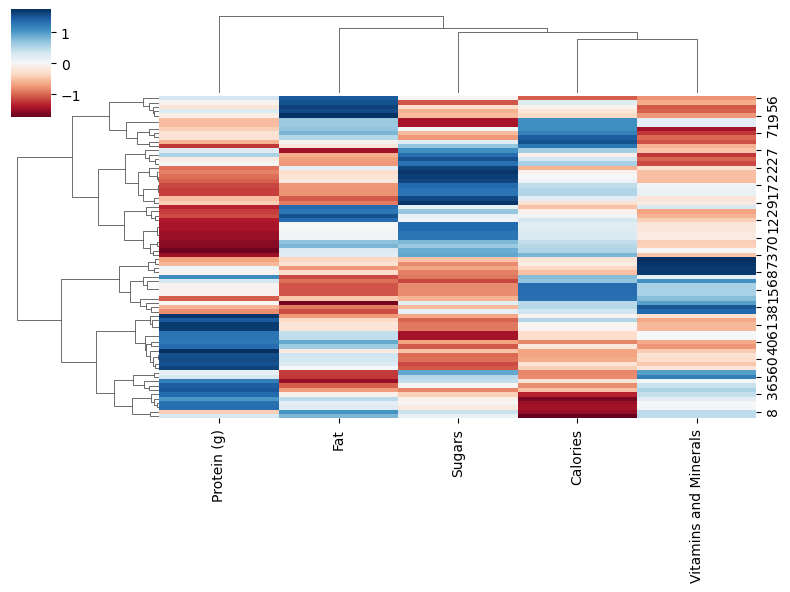

In [15]:
# 1. Create a cluster map of the “best” results and interpret the clusters , considering row level standardization
sns.clustermap(data_scaled, method='ward', cmap='RdBu', figsize=(8,6), xticklabels=data_scaled.columns , z_score=0)
plt.show()

In [16]:
# 2 update scaled dataframe so that each row has a mean of 0 and standard deviation of 1

# calculate mean and standard deviation for each row
row_means = data_scaled.mean(axis=1)
row_stds = data_scaled.std(axis=1)

# divide each element in the row by the standard deviation
data_zscore = data_scaled.sub(row_means, axis=0).div(row_stds, axis=0)
data_zscore.head()

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,-1.499896,1.309765,0.186034,-0.008217,0.012314
1,-0.055780,-0.217442,1.648455,-0.309088,-1.066146
2,-1.456012,1.342446,0.223195,-0.159798,0.050168
3,-1.325007,1.372921,-0.077370,-0.405404,0.434861
4,0.070495,-1.130888,1.530469,0.127798,-0.597875


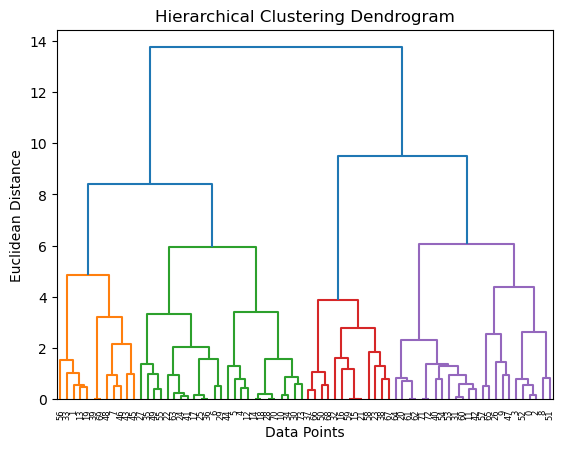

In [36]:
# 3 update the dendrogram
linkage_matrix_zscore = linkage(data_zscore, method='ward')
dendrogram_info_zscore = dendrogram(linkage_matrix_zscore, color_threshold=7.5)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance");

In [ ]:
# Visually it looks like 6 clusters , if we cut at 5.5

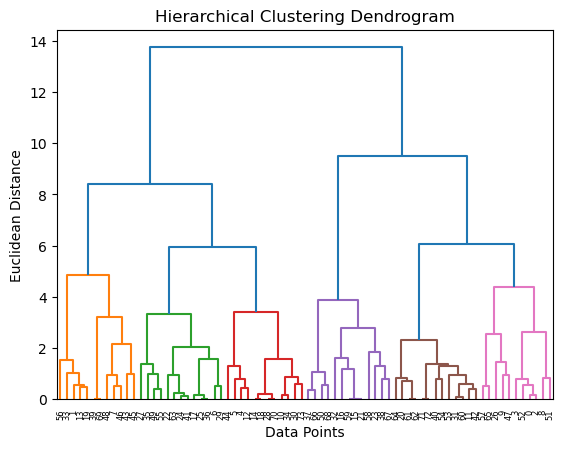

In [37]:
# 4 update the dendrogram with color_threshold as 5.5
linkage_matrix_zscore = linkage(data_zscore, method='ward')
dendrogram_info_zscore = dendrogram(linkage_matrix_zscore, color_threshold=5.5)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance");

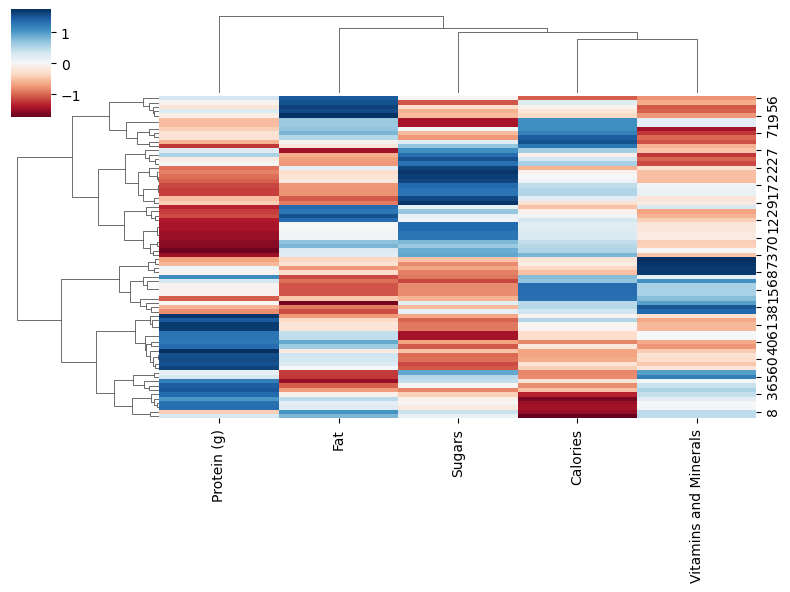

In [30]:
# 5. Create a cluster map of the “best” results and interpret the clusters
sns.clustermap(data_scaled, method='ward', cmap='RdBu', figsize=(8,6), xticklabels=data_scaled.columns , z_score=0)
plt.show()

In [ ]:
# Cluster 1 : High on Fat and Calories
# Cluster 2 : High on sugar and calories
# Cluster 3 : High Fat and Sugar
# Cluster 4 : High Vitamins and Minerals , moderate Calories
# Cluster 5 : High protein , moderate fats
# Cluster 6 : High protein and Vitamin and Minerals

In [22]:
# 6. Fit an agglomerative clustering model on the scaled data set with four clusters and view the labels
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(6)
agg.fit(data_zscore)

agg.labels_

array([1, 0, 1, 1, 3, 3, 5, 0, 1, 1, 3, 4, 3, 0, 3, 2, 2, 5, 3, 0, 4, 2,
       5, 2, 5, 5, 1, 5, 3, 5, 3, 4, 2, 0, 3, 5, 5, 2, 2, 0, 4, 5, 4, 0,
       3, 0, 0, 1, 0, 5, 2, 1, 1, 4, 4, 5, 0, 1, 2, 2, 4, 4, 4, 5, 4, 1,
       2, 2, 2, 0, 3, 4, 4, 3], dtype=int64)

In [23]:
from collections import Counter

In [24]:
Counter(agg.labels_)

Counter({5: 13, 4: 13, 2: 13, 0: 12, 3: 12, 1: 11})

In [25]:
# get the x-axis value from the dendogram ( ivl = index variable list )

data_points = pd.Series(dendrogram_info_zscore['ivl'] , name='Data Point').astype('int')
data_points.head()

0    56
1    33
2     1
3    13
4    19
Name: Data Point, dtype: int32

In [26]:
# get the clusters from the dendograms ( fclusters = flat clusters )
from scipy.cluster.hierarchy import fcluster

den_clusters = pd.Series(fcluster(linkage_matrix_zscore , 5.5 , criterion='distance') , name = 'Dendogram Cluster')
den_clusters

0     6
1     1
2     6
3     6
4     3
     ..
69    1
70    3
71    5
72    5
73    3
Name: Dendogram Cluster, Length: 74, dtype: int32

In [27]:
# view the cluster assignments from the dendogram

den_clusters_df = den_clusters.reset_index()
den_clusters_df.columns = ['Data Point' , 'Dendogram Cluster']
den_clusters_df.head()

,Data Point,Dendogram Cluster
0,0,6
1,1,1
2,2,6
3,3,6
4,4,3


In [28]:
# view the datapoints within each cluster

den_clusters_df.sort_values(['Dendogram Cluster' , 'Data Point'])

,Data Point,Dendogram Cluster
1,1,1
7,7,1
13,13,1
19,19,1
33,33,1
...,...,...
47,47,6
51,51,6
52,52,6
57,57,6


In [29]:
den_clusters_df['Dendogram Cluster'].value_counts()

Dendogram Cluster
2    13
5    13
4    13
1    12
3    12
6    11
Name: count, dtype: int64

In [35]:
den_clusters_df.loc[27]

Data Point           27
Dendogram Cluster     2
Name: 27, dtype: int64